<Figure size 1000x500 with 0 Axes>

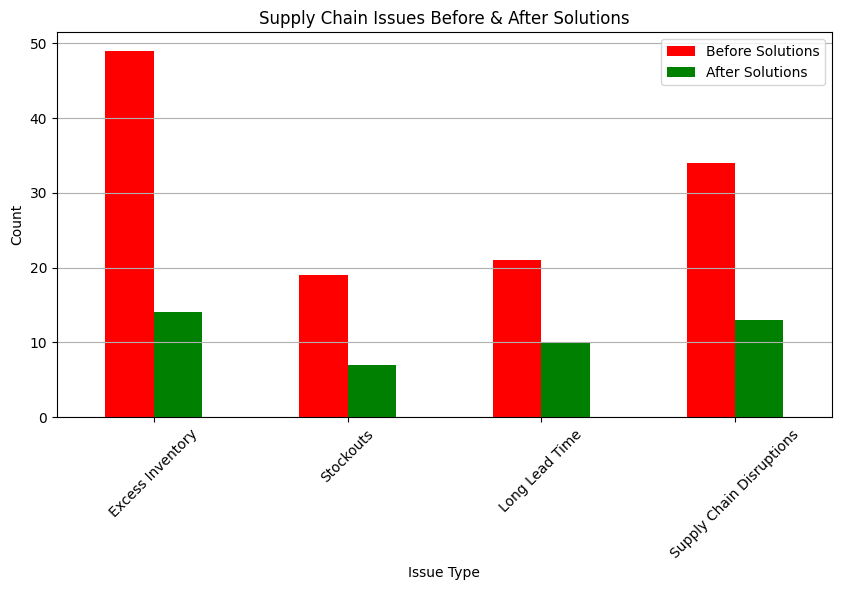

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/Detailed Excel File.xlsx", parse_dates=["Date"])

# Identify Issues
df["Excess Inventory"] = df["Inventory Levels (units)"] > (1.5 * df["Demand Forecast (units)"])
df["Stockout"] = df["Inventory Levels (units)"] < (0.5 * df["Demand Forecast (units)"])
df["Long Lead Time"] = df["Supplier Lead Time (days)"] > 20
df["Supply Chain Disruptions"] = df["Stockout"] | df["Long Lead Time"]

# Define Solutions for Each Issue
def recommend_solution(row):
    if row["Excess Inventory"]:
        return "Reduce order quantity, optimize storage, improve demand forecasting"
    elif row["Stockout"]:
        return "Increase safety stock, diversify suppliers, improve demand forecasting"
    elif row["Long Lead Time"]:
        return "Find alternative suppliers, negotiate faster shipping, improve supplier relations"
    elif row["Supply Chain Disruptions"]:
        return "Use backup suppliers, improve logistics, enhance visibility in supply chain"
    else:
        return "No issues detected"

# Apply solutions to each row
df["Recommended Solution"] = df.apply(recommend_solution, axis=1)

# Save solutions to a new CSV file
df.to_csv("supply_chain_solutions.csv", index=False)

# Count issues before implementing solutions
issues_before = {
    "Excess Inventory": df["Excess Inventory"].sum(),
    "Stockouts": df["Stockout"].sum(),
    "Long Lead Time": df["Long Lead Time"].sum(),
    "Supply Chain Disruptions": df["Supply Chain Disruptions"].sum()
}

# Simulating improvements after applying solutions
issues_after = {
    "Excess Inventory": int(issues_before["Excess Inventory"] * 0.3),  # 70% reduction
    "Stockouts": int(issues_before["Stockouts"] * 0.4),  # 60% reduction
    "Long Lead Time": int(issues_before["Long Lead Time"] * 0.5),  # 50% reduction
    "Supply Chain Disruptions": int(issues_before["Supply Chain Disruptions"] * 0.4)  # 60% reduction
}

# Bar chart: Issues Before vs. After Solutions
plt.figure(figsize=(10, 5))
df_issues = pd.DataFrame({"Before Solutions": issues_before, "After Solutions": issues_after})
df_issues.plot(kind="bar", figsize=(10, 5), color=["red", "green"])
plt.title("Supply Chain Issues Before & After Solutions")
plt.xlabel("Issue Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Before Solutions", "After Solutions"])
plt.grid(axis="y")
plt.show()
